In [99]:
#remove movies with budget 0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import classes.database as db
import seaborn as sns


#retrieve data from database
db.connect()

df = pd.DataFrame()
df = db.getMovieData("movies_full")

db.shutdown()

Exception during reset or similar
Traceback (most recent call last):
  File "c:\Users\bicic\anaconda3\envs\spenv\lib\site-packages\sqlalchemy\pool\base.py", line 988, in _finalize_fairy
    fairy._reset(
  File "c:\Users\bicic\anaconda3\envs\spenv\lib\site-packages\sqlalchemy\pool\base.py", line 1437, in _reset
    pool._dialect.do_rollback(self)
  File "c:\Users\bicic\anaconda3\envs\spenv\lib\site-packages\sqlalchemy\engine\default.py", line 693, in do_rollback
    dbapi_connection.rollback()
psycopg2.OperationalError: server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.



Data downloaded
PostgreSQL connection is closed


In [100]:
df.head()
df.shape

(140400, 17)

In [101]:
#remove movies with less than 1000 votes and budget less than 50000
df = df.loc[df['vote_count'] >= 1000]
df['budget'] = df['budget'].apply(lambda x: np.nan if x <= 50000 else x)

df = df.dropna(subset=['budget']).reset_index(drop=True)

Text(0.5, 1.0, 'Budget vs Ratings')

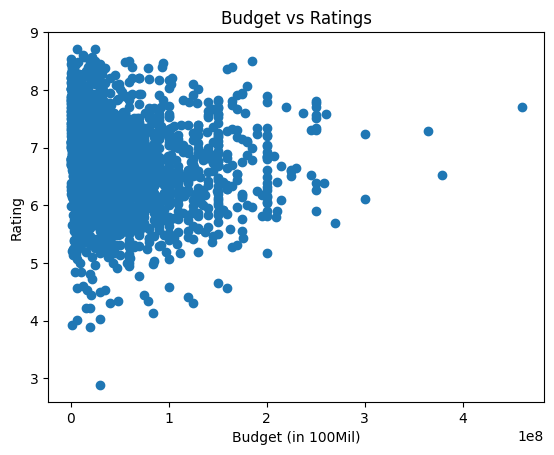

In [102]:
plt.scatter(df['budget'], df['vote_average'])

plt.xlabel('Budget (in 100Mil)')
plt.ylabel('Rating')
plt.title('Budget vs Ratings')


Text(0, 0.5, 'Number of Movies')

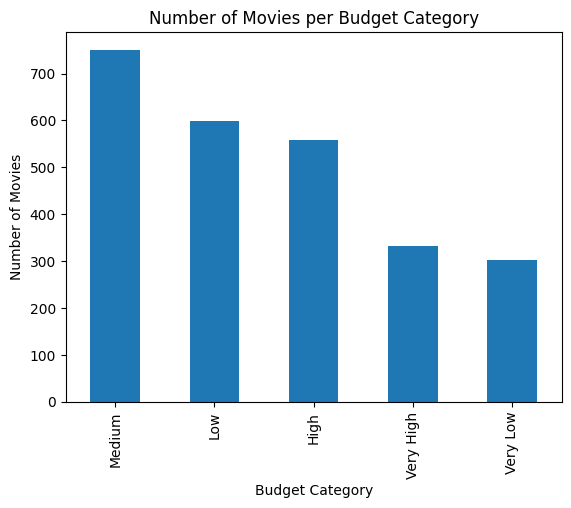

In [103]:
#breaking up 
budget_ranges = [50000, 5000000, 20000000, 50000000, 100000000, float('inf')]
category_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['budget_category'] = pd.cut(df['budget'], bins=budget_ranges, labels=category_names, right=False)

df['budget_category'].value_counts().plot(kind='bar')

plt.title('Number of Movies per Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Number of Movies')

In [104]:
#figure out the avaragae rating for each budget category

print(df.groupby('budget_category')['vote_average'].mean())

budget_category
Very Low     7.266480
Low          6.918504
Medium       6.656889
High         6.528172
Very High    6.622381
Name: vote_average, dtype: float64


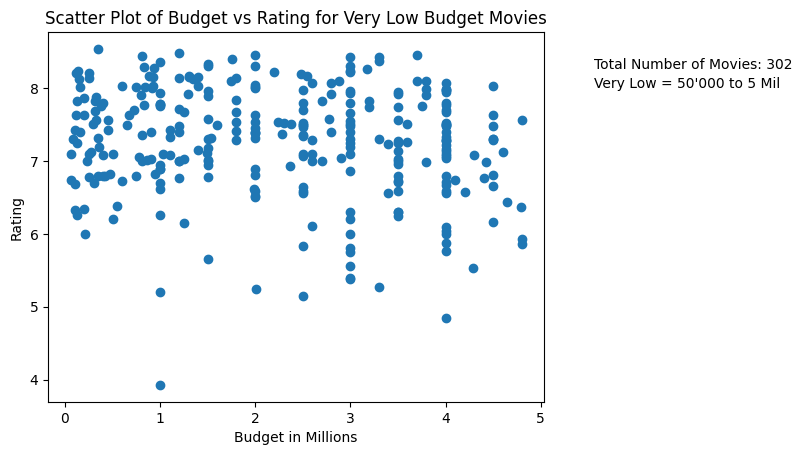

In [105]:
verylow_budget_movies = df[df['budget_category'] == 'Very Low']

plt.scatter(verylow_budget_movies['budget'], verylow_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Rating')
plt.title('Scatter Plot of Budget vs Rating for Very Low Budget Movies')

plt.xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000], ['0', '1', '2', '3', '4','5'])
total_movies = len(verylow_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'Very Low = 50\'000 to 5 Mil', transform=plt.gca().transAxes)

#sns.regplot(x=verylow_budget_movies['budget'], y=verylow_budget_movies['vote_average'], scatter=False, color='purple')

plt.show()

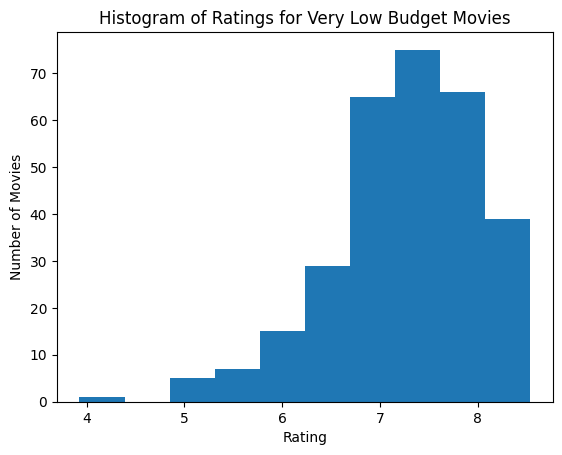

In [106]:
#Histogram of ratings for very low budget movies 
plt.hist(verylow_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Histogram of Ratings for Very Low Budget Movies')

total_movies = len(verylow_budget_movies)

plt.show()

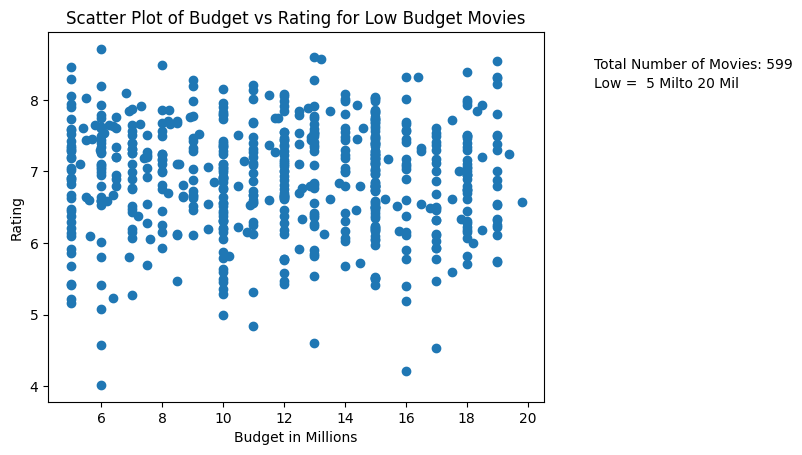

In [107]:
low_budget_movies = df[df['budget_category'] == 'Low']

plt.scatter(low_budget_movies['budget'], low_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Rating')
plt.title('Scatter Plot of Budget vs Rating for Low Budget Movies')


#sns.regplot(x=low_budget_movies['budget'], y=low_budget_movies['vote_average'], scatter=False, color='purple')
plt.xticks([6000000, 8000000, 10000000,12000000, 14000000,16000000, 18000000, 20000000], ['6', '8', '10', '12', '14','16', '18', '20'])
total_movies = len(low_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'Low =  5 Milto 20 Mil', transform=plt.gca().transAxes)

plt.show()

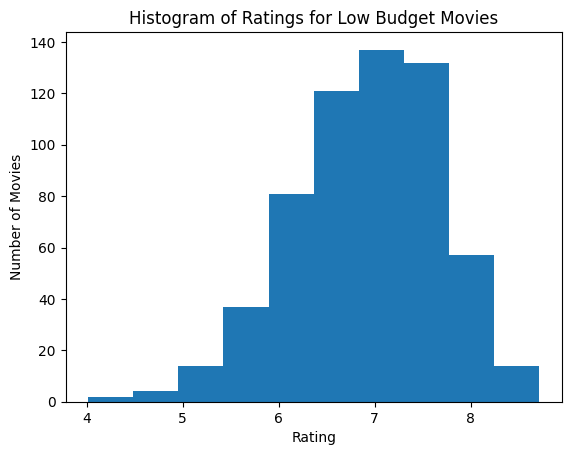

In [108]:
#Histogram of ratings for low budget movies 
plt.hist(low_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Histogram of Ratings for Low Budget Movies')

total_movies = len(low_budget_movies)

plt.show()

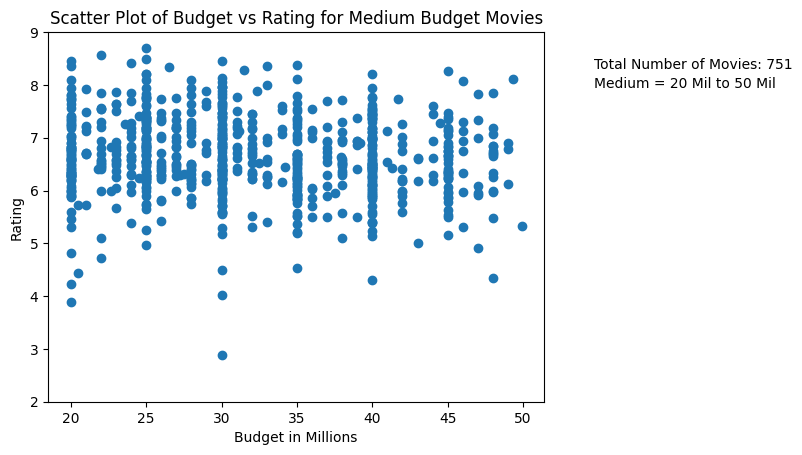

In [109]:
medium_budget_movies = df[df['budget_category'] == 'Medium']

plt.scatter(medium_budget_movies['budget'], medium_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Rating')
plt.title('Scatter Plot of Budget vs Rating for Medium Budget Movies')

plt.xticks([20000000, 25000000, 30000000, 35000000, 40000000, 45000000, 50000000], ['20', '25', '30', '35', '40','45', '50'])
plt.ylim(2, 9)
total_movies = len(medium_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'Medium = 20 Mil to 50 Mil', transform=plt.gca().transAxes)

plt.show()

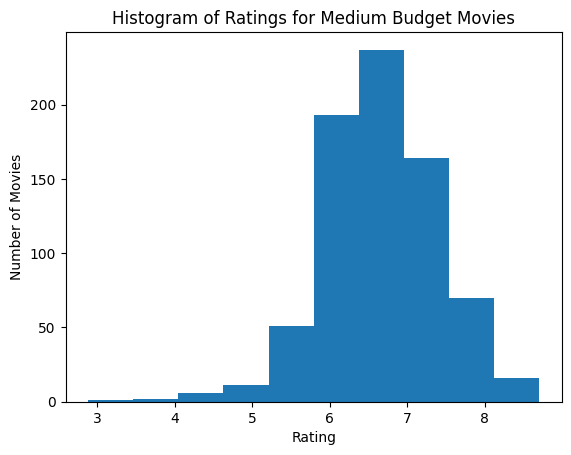

In [110]:
#Histogram of ratings for medium budget movies 
plt.hist(medium_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Histogram of Ratings for Medium Budget Movies')

total_movies = len(medium_budget_movies)

plt.show()

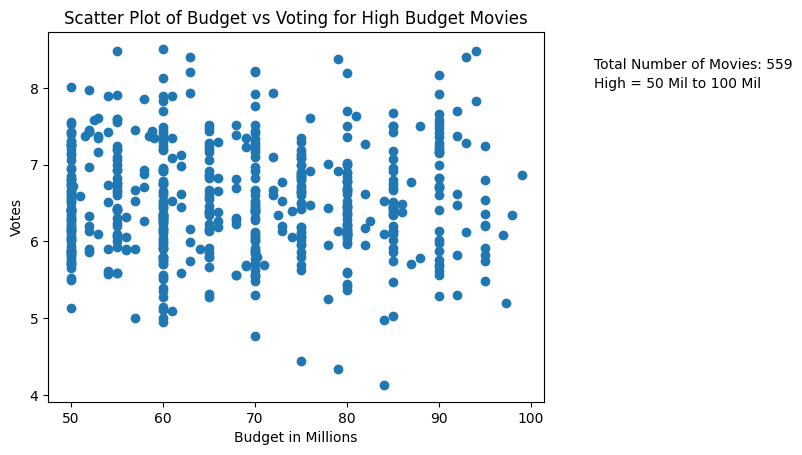

In [111]:
high_budget_movies = df[df['budget_category'] == 'High']

plt.scatter(high_budget_movies['budget'], high_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for High Budget Movies')

plt.xticks([50000000, 60000000, 70000000, 80000000, 90000000, 100000000], ['50', '60', '70', '80', '90','100'])


total_movies = len(high_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'High = 50 Mil to 100 Mil', transform=plt.gca().transAxes)
plt.show()

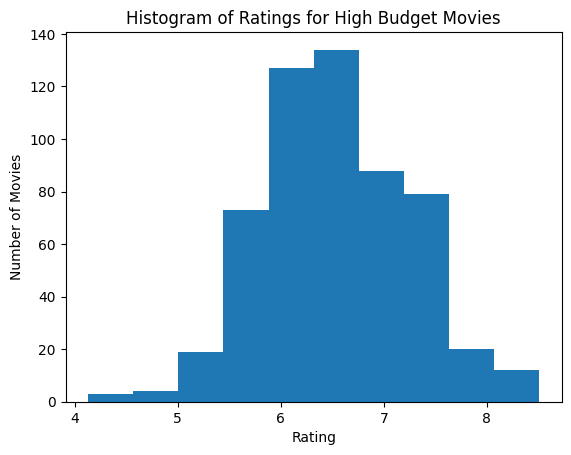

In [112]:
#Histogram of ratings for high budget movies 
plt.hist(high_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Rating')
plt.title('Histogram of Ratings for High Budget Movies')

total_movies = len(high_budget_movies)

plt.show()

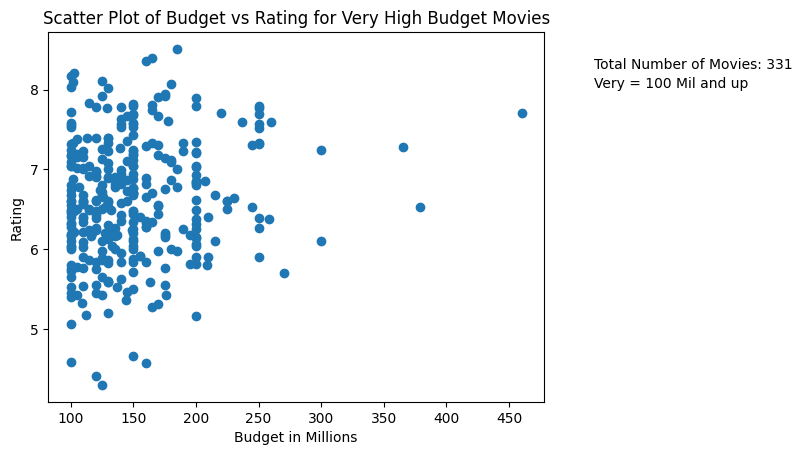

In [113]:
veryhigh_budget_movies = df[df['budget_category'] == 'Very High']

plt.scatter(veryhigh_budget_movies['budget'], veryhigh_budget_movies['vote_average'])
plt.xlabel('Budget in Millions')
plt.ylabel('Rating')
plt.title('Scatter Plot of Budget vs Rating for Very High Budget Movies')

plt.xticks([100000000, 150000000, 200000000, 250000000, 300000000, 350000000, 400000000, 450000000], ['100', '150', '200', '250', '300','350', '400', '450'])



total_movies = len(veryhigh_budget_movies)
plt.text(1.1, 0.9, f'Total Number of Movies: {total_movies}', transform=plt.gca().transAxes)
plt.text(1.1, 0.85, f'Very = 100 Mil and up', transform=plt.gca().transAxes)

plt.show()

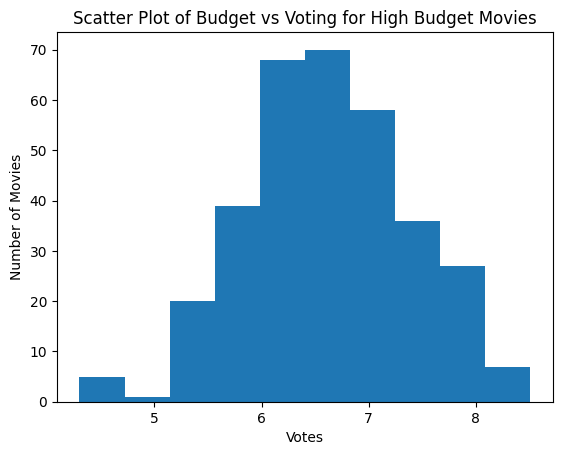

In [114]:
plt.hist(veryhigh_budget_movies['vote_average'], bins=10)
plt.ylabel('Number of Movies')
plt.xlabel('Votes')
plt.title('Scatter Plot of Budget vs Voting for High Budget Movies')

total_movies = len(veryhigh_budget_movies)